#   Kaggle probelm (House_Price_Prediction)
## 1. Feature_Engineering

In [503]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [504]:
train = pd.read_csv("C:/Users/user/Desktop/w/New folder/train.csv")

In [505]:
train.shape

(1460, 81)

In [506]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [507]:
train.drop(["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"],axis = 1,inplace = True)

In [508]:
train.shape

(1460, 76)

In [509]:
#numeric = train.select_dtypes(include = ["int64","float64"])
#category = train.select_dtypes(include = [object])
#print("numeric values shape :",numeric.shape)
#print("categoric values shape",category.shape)

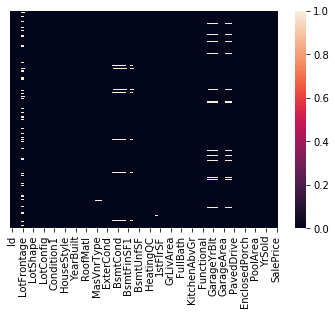

In [510]:
sns.heatmap(train.isnull(),yticklabels=False,)

In [511]:
train["LotFrontage"] = train.LotFrontage.fillna(train.LotFrontage.mean())
train["MasVnrArea"]  = train.MasVnrArea.fillna(train.MasVnrArea.mean())        
train["GarageYrBlt"]   = train.GarageYrBlt.fillna(train.GarageYrBlt.mean())


In [512]:
train["MasVnrType"]   = train.MasVnrType.fillna(train.MasVnrType.mode()[0])
train["BsmtQual"]     = train.BsmtQual.fillna(train.BsmtQual.mode()[0])       
train["BsmtCond"]     = train.BsmtCond.fillna(train.BsmtCond.mode()[0])   
train["BsmtExposure"] = train.BsmtExposure.fillna(train.BsmtExposure.mode()[0])    
train["BsmtFinType1"] = train.BsmtFinType1.fillna(train.BsmtFinType1.mode()[0])
train["BsmtFinType2"] = train.BsmtFinType2.fillna(train.BsmtFinType2.mode()[0])
train["Electrical"]   = train.Electrical.fillna(train.Electrical.mode()[0])
train["GarageType"]   = train.GarageType.fillna(train.GarageType.mode()[0])
train["GarageFinish"] = train.GarageFinish.fillna(train.GarageFinish.mode()[0])
train["GarageQual"]   = train.GarageQual.fillna(train.GarageQual.mode()[0])
train["GarageCond"]   = train.GarageCond.fillna(train.GarageCond.mode()[0])

In [513]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

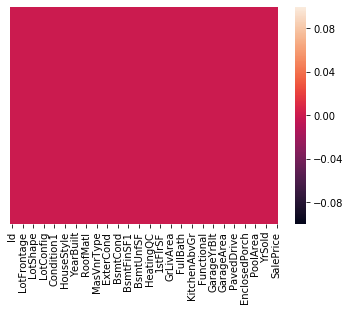

In [514]:
sns.heatmap(train.isnull(),yticklabels=False,)

In [515]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [516]:
train.drop(["Id"],inplace = True,axis =1)

In [517]:
train.shape

(1460, 75)

In [518]:
main_df = train.copy()

In [519]:
test = pd.read_csv("formulated.csv")

In [520]:
both = pd.concat([train,test],axis = 0,sort = False )


In [521]:
#handling_categorical_column
df_cat = both.select_dtypes(include= ["object"])
col = df_cat.columns
for col in df_cat.columns:
    df = pd.get_dummies(both[col],prefix ="M_").iloc[:,1:]
    both = pd.concat([both,df],axis = 1)
print("before removing original categorical column",both.shape)    

before removing original categorical column (2919, 271)


In [522]:
#handling_categorical_column
df_cat       = both.select_dtypes(include= ["object"])
multi_col    = df_cat.columns
a = list(multi_col)
both.drop(a,inplace = True,axis = 1)   
print("After removing original categorical column",both.shape)

After removing original categorical column (2919, 233)


In [523]:
#a = both.columns
#print(len(a))
#l = []
#for i in a:
#    c=0
#    for j in a:
#        if(i==j):
#            c+=1
#            if(c>=2):
#                l.append(i)
#print(len(l))            
    

In [524]:
both = both.iloc[:,~both.columns.duplicated()]

In [525]:
len(both.columns)

177

In [526]:
final_train = both.iloc[0:1460]
final_test  = both.iloc[1460:] 
print(final_test.shape)

(1459, 177)


In [527]:
final_test.drop("SalePrice",axis = 1,inplace = True)
print(final_test.shape)

(1459, 176)


In [528]:
print("final_train shape",final_train.shape)
print("final_test shape",final_test.shape)

final_train shape (1460, 177)
final_test shape (1459, 176)


# Training_Data

In [529]:
x_train = final_train.drop("SalePrice",axis = 1)
y_train = final_train.loc[:,"SalePrice"]               

# Testing_Data

In [530]:
x_test = final_test.iloc[:,:]

# Training_data_using_LR_algo

In [531]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score,mean_squared_error

In [532]:
#x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,train_size = 1,random_state =1)
#reg = LinearRegression()
#reg.fit(x_train,y_train)
#y_test = reg.predict(x_test)

# To Be Continued ....